In [1]:
import requests # library to handle requests
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Convert an address into latitude and longitude values
from geopy.geocoders import Nominatim
import geopy.geocoders

import json # library to handle JSON files

# k-means from clustering stage
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import folium
import matplotlib.cm as cm
import matplotlib.colors as colors


### Retrieve borough names from London Borough Atlas

In [2]:
london_atlas = pd.read_excel('https://data.london.gov.uk/dataset/london-borough-profiles/resource/445fbb06-8945-499b-b1e6-1933afa3c642/download')

In [3]:
london_atlas.head()

,Unnamed: 0,Unnamed: 1,Population and Age,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202
0,NaN,NaN,Population Estimates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NEETs (rates),NaN,NaN,NaN,NaN,NaN,NaN
1,New code,Area name,1999,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,...,2013,2014,2015,2009,2010,2011,2012,2013,2014,2015
2,E09000001,City of London,6581,7014.0,7359.0,7280.0,7115.0,7118.0,7131.0,7254.0,...,10,0,0,0.6,0.2,0.9,0.3,5.05902,.,0
3,E09000002,Barking and Dagenham,162444,163893.0,165654.0,166357.0,166210.0,165610.0,166275.0,167157.0,...,460,460,460,7.9,6.9,6.6,5.4,5.75432,5.7,5.78141
4,E09000003,Barnet,313469,315784.0,319481.0,320552.0,321802.0,323723.0,327541.0,330801.0,...,230,250,220,3.8,3.6,4.1,3.5,2.30762,2.5,2.03355


In [4]:
london_atlas_2 = london_atlas.drop([0,1,2], axis=0)
london_atlas_2.head()

,Unnamed: 0,Unnamed: 1,Population and Age,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202
3,E09000002,Barking and Dagenham,162444,163893.0,165654.0,166357.0,166210.0,165610.0,166275.0,167157.0,...,460,460,460,7.9,6.9,6.6,5.4,5.75432,5.7,5.78141
4,E09000003,Barnet,313469,315784.0,319481.0,320552.0,321802.0,323723.0,327541.0,330801.0,...,230,250,220,3.8,3.6,4.1,3.5,2.30762,2.5,2.03355
5,E09000004,Bexley,217458,218717.0,218757.0,219123.0,220016.0,220917.0,222391.0,223280.0,...,360,290,240,5,4.6,3.4,4,4.23032,3.4,2.75701
6,E09000005,Brent,260317,264945.0,269620.0,269871.0,268323.0,268335.0,270939.0,276504.0,...,300,280,240,4.6,5,3.9,2.4,2.99202,2.6,2.23939
7,E09000006,Bromley,294902,295317.0,296218.0,296668.0,297253.0,297307.0,299421.0,300963.0,...,630,450,360,4.2,4.3,5.2,4.1,5.77611,4.3,3.43237


In [5]:
borough_name = london_atlas_2[['Unnamed: 1']]
borough_name.reset_index(drop = True, inplace = True)

In [6]:
borough_name.drop([32, 33,34,35,36], inplace = True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [7]:
borough_name.rename(columns={'Unnamed: 1': 'Borough'}, inplace=True);

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [8]:
new_borough_names = borough_name + ', London'
new_borough_names.shape

(32, 1)

In [9]:
location_data = pd.DataFrame(columns=['Borough', 'Longitude', 'Latitude'])

### Retrieve geographical coordinates of boroughs

In [10]:
geolocator = Nominatim(user_agent="open_street_map")

In [11]:
for name in new_borough_names['Borough']:
    geo_data = geolocator.geocode(name)
    df = pd.DataFrame([[name, geo_data.longitude, geo_data.latitude]], columns = ['Borough', 'Longitude', 'Latitude'])
    location_data = location_data.append(df, ignore_index = True)

In [12]:
location_data

,Borough,Longitude,Latitude
0,"Barking and Dagenham, London",0.150504,51.554117
1,"Barnet, London",-0.200226,51.653090
2,"Bexley, London",0.150488,51.441679
3,"Brent, London",-0.275760,51.563826
4,"Bromley, London",0.014814,51.402805
5,"Camden, London",-0.139560,51.542305
6,"Croydon, London",-0.101957,51.371305
7,"Ealing, London",-0.305195,51.512655
8,"Enfield, London",-0.081018,51.652085
9,"Greenwich, London",-0.004542,51.482084


In [13]:
london = geolocator.geocode('London, UK')
print('Latitude: ',london.latitude, ', Longitude: ',london.longitude)

Latitude:  51.5073219 , Longitude:  -0.1276474


In [14]:
map_clusters = folium.Map(location=[london.latitude, london.longitude], zoom_start=10)

In [15]:
for lat, lon, borough in zip(location_data['Latitude'], location_data['Longitude'], location_data['Borough']):
    folium.CircleMarker(
    [lat,lon],
    radius=5,
    popup=borough,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_clusters)
    
map_clusters   

### Retrieve popular restaurants around boroughs (r=2000)

In [16]:
def getNearbyVenues(names, latitudes, longitudes):
    radius=2000
    LIMIT=100
    venues_list=[]
    QUERY = 'restaurant'
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            radius, 
            LIMIT,
            QUERY)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
CLIENT_ID = 'OUCZDN3HJQ5CINWIIRUEX1KDPCWHDFRFZRO1XM4MBDIRVMB3' # your Foursquare ID
CLIENT_SECRET = '1L5FNVO2GPOLSJJX0UGNFVFTHFW3M5BOLPI0JSTFS5W4QBVW' # your Foursquare Secret
VERSION = '20160114'

In [18]:
london_venues = getNearbyVenues(names=location_data['Borough'],
                                   latitudes=location_data['Latitude'],
                                   longitudes=location_data['Longitude']
                                  )

Barking and Dagenham, London
Barnet, London
Bexley, London
Brent, London
Bromley, London
Camden, London
Croydon, London
Ealing, London
Enfield, London
Greenwich, London
Hackney, London
Hammersmith and Fulham, London
Haringey, London
Harrow, London
Havering, London
Hillingdon, London
Hounslow, London
Islington, London
Kensington and Chelsea, London
Kingston upon Thames, London
Lambeth, London
Lewisham, London
Merton, London
Newham, London
Redbridge, London
Richmond upon Thames, London
Southwark, London
Sutton, London
Tower Hamlets, London
Waltham Forest, London
Wandsworth, London
Westminster, London


In [19]:
london_venues.head(20)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Barking and Dagenham, London",51.554117,0.150504,Lara Grill,51.562445,0.147178,Turkish Restaurant
1,"Barking and Dagenham, London",51.554117,0.150504,The Pipe Major,51.545795,0.165834,Restaurant
2,"Barking and Dagenham, London",51.554117,0.150504,Heath Pie Shop,51.560414,0.147655,Diner
3,"Barking and Dagenham, London",51.554117,0.150504,New China Gold,51.561269,0.141839,Chinese Restaurant
4,"Barking and Dagenham, London",51.554117,0.150504,Papa John's Pizza,51.542671,0.147628,Pizza Place
5,"Barking and Dagenham, London",51.554117,0.150504,Gunay's Cafe,51.546347,0.165795,Café
6,"Barking and Dagenham, London",51.554117,0.150504,McDonald's,51.565406,0.145384,Fast Food Restaurant
7,"Barnet, London",51.653090,-0.200226,Joie de Vie,51.653659,-0.201288,Bakery
8,"Barnet, London",51.653090,-0.200226,Spizzico,51.656600,-0.201802,Italian Restaurant
9,"Barnet, London",51.653090,-0.200226,Potters Pantry,51.651802,-0.179730,Café


In [20]:
london_venues.groupby('Neighborhood').count()


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Barking and Dagenham, London",7,7,7,7,7,7
"Barnet, London",22,22,22,22,22,22
"Bexley, London",29,29,29,29,29,29
"Brent, London",78,78,78,78,78,78
"Bromley, London",46,46,46,46,46,46
"Camden, London",100,100,100,100,100,100
"Croydon, London",83,83,83,83,83,83
"Ealing, London",100,100,100,100,100,100
"Enfield, London",38,38,38,38,38,38


### One hot encoding

In [21]:
# one hot encoding
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

london_onehot.head()

,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,...,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Veneto Restaurant,Vietnamese Restaurant,Wings Joint
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
london_onehot.insert(loc=0, column='Borough', value= london_venues['Neighborhood'])

In [23]:
london_onehot.head()

,Borough,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,...,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Veneto Restaurant,Vietnamese Restaurant,Wings Joint
0,"Barking and Dagenham, London",0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,"Barking and Dagenham, London",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Barking and Dagenham, London",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Barking and Dagenham, London",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Barking and Dagenham, London",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Frequency of each type of restaurants

In [24]:
london_grouped = london_onehot.groupby('Borough').mean()
london_grouped.head(10)

,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,...,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Veneto Restaurant,Vietnamese Restaurant,Wings Joint
Borough,,,,,,,,,,,,,,,,,,,,,
"Barking and Dagenham, London",0.0,0.0,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.000000,0.142857,0.0,0.00,0.0,0.000000,0.0
"Barnet, London",0.0,0.0,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.045455,0.000000,0.0,0.00,0.0,0.000000,0.0
"Bexley, London",0.0,0.0,0.068966,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.0
"Brent, London",0.0,0.0,0.025641,0.0,0.00,0.025641,0.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.012821,0.000000,0.0,0.00,0.0,0.000000,0.0
"Bromley, London",0.0,0.0,0.021739,0.0,0.00,0.043478,0.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.000000,0.021739,0.0,0.00,0.0,0.000000,0.0
"Camden, London",0.0,0.0,0.000000,0.0,0.01,0.020000,0.0,0.0,0.0,0.01,...,0.0,0.0,0.00,0.000000,0.000000,0.0,0.04,0.0,0.010000,0.0
"Croydon, London",0.0,0.0,0.012048,0.0,0.00,0.036145,0.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.012048,0.000000,0.0,0.00,0.0,0.012048,0.0
"Ealing, London",0.0,0.0,0.000000,0.0,0.00,0.010000,0.0,0.0,0.0,0.02,...,0.0,0.0,0.01,0.030000,0.010000,0.0,0.00,0.0,0.020000,0.0
"Enfield, London",0.0,0.0,0.026316,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.000000,0.026316,0.0,0.00,0.0,0.000000,0.0


## Popular Italian restaurants around boroughs

In [25]:
london_venues2 = london_venues.loc[london_venues['Venue Category'].str.contains('Café') == True]
london_venues2.reset_index(drop=True, inplace=True)

In [26]:
london_venues2.groupby('Neighborhood').count().head(10)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Barking and Dagenham, London",1,1,1,1,1,1
"Barnet, London",2,2,2,2,2,2
"Brent, London",6,6,6,6,6,6
"Bromley, London",5,5,5,5,5,5
"Camden, London",14,14,14,14,14,14
"Croydon, London",6,6,6,6,6,6
"Ealing, London",8,8,8,8,8,8
"Enfield, London",5,5,5,5,5,5
"Greenwich, London",20,20,20,20,20,20


In [27]:
italian_restaurants_count = london_venues2.groupby('Neighborhood').count()
italian_restaurants_count = italian_restaurants_count[['Venue Category']]
italian_restaurants_count.head()

,Venue Category
Neighborhood,
"Barking and Dagenham, London",1
"Barnet, London",2
"Brent, London",6
"Bromley, London",5
"Camden, London",14


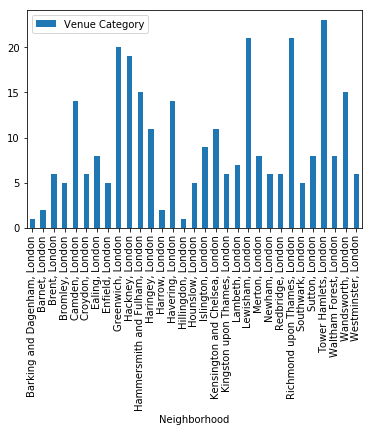

In [28]:

italian_restaurants_count.plot(kind='bar')

## Modeling

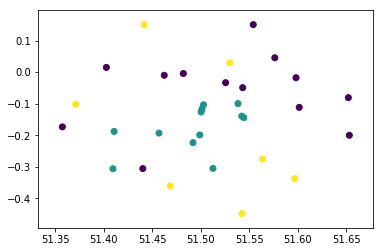

In [29]:
kclusters = 3

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped)
plt.scatter(location_data['Latitude'], location_data['Longitude'], c = kmeans.labels_)

In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [31]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = london_grouped.index

In [32]:
for ind in np.arange(london_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Barking and Dagenham, London",Chinese Restaurant,Restaurant,Turkish Restaurant,Diner,Café,Fast Food Restaurant,Pizza Place,Eastern European Restaurant,Currywurst Joint,Deli / Bodega
1,"Barnet, London",Restaurant,Pizza Place,Chinese Restaurant,Café,Indian Restaurant,Fast Food Restaurant,Italian Restaurant,Modern European Restaurant,Seafood Restaurant,Bakery
2,"Bexley, London",Fast Food Restaurant,Chinese Restaurant,Italian Restaurant,American Restaurant,Greek Restaurant,Steakhouse,Restaurant,Burger Joint,Portuguese Restaurant,Mediterranean Restaurant
3,"Brent, London",Indian Restaurant,Restaurant,Sandwich Place,Fast Food Restaurant,Café,Pizza Place,Bakery,Chinese Restaurant,Portuguese Restaurant,Italian Restaurant
4,"Bromley, London",Indian Restaurant,Pizza Place,Café,Sandwich Place,Italian Restaurant,Fast Food Restaurant,Sushi Restaurant,Bakery,Chinese Restaurant,Asian Restaurant
5,"Camden, London",Café,Burger Joint,Pizza Place,Italian Restaurant,Bakery,Deli / Bodega,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant,French Restaurant,Gastropub
6,"Croydon, London",Fast Food Restaurant,Sandwich Place,Indian Restaurant,Pizza Place,Café,Bakery,Portuguese Restaurant,Italian Restaurant,Sushi Restaurant,Asian Restaurant
7,"Ealing, London",Café,Pizza Place,Italian Restaurant,Indian Restaurant,Bakery,Fast Food Restaurant,Restaurant,Japanese Restaurant,Burger Joint,Diner
8,"Enfield, London",Pizza Place,Café,Indian Restaurant,Fast Food Restaurant,Portuguese Restaurant,Restaurant,Fish & Chips Shop,English Restaurant,Bakery,Italian Restaurant
9,"Greenwich, London",Café,Indian Restaurant,Pizza Place,Vietnamese Restaurant,Japanese Restaurant,Chinese Restaurant,Burger Joint,Bakery,Restaurant,Italian Restaurant


In [33]:
neighborhoods_venues_sorted.insert(loc=1, column='Cluster', value=kmeans.labels_)


In [34]:
neighborhoods_venues_sorted.head(10)

,Neighborhood,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Barking and Dagenham, London",0,Chinese Restaurant,Restaurant,Turkish Restaurant,Diner,Café,Fast Food Restaurant,Pizza Place,Eastern European Restaurant,Currywurst Joint,Deli / Bodega
1,"Barnet, London",0,Restaurant,Pizza Place,Chinese Restaurant,Café,Indian Restaurant,Fast Food Restaurant,Italian Restaurant,Modern European Restaurant,Seafood Restaurant,Bakery
2,"Bexley, London",2,Fast Food Restaurant,Chinese Restaurant,Italian Restaurant,American Restaurant,Greek Restaurant,Steakhouse,Restaurant,Burger Joint,Portuguese Restaurant,Mediterranean Restaurant
3,"Brent, London",2,Indian Restaurant,Restaurant,Sandwich Place,Fast Food Restaurant,Café,Pizza Place,Bakery,Chinese Restaurant,Portuguese Restaurant,Italian Restaurant
4,"Bromley, London",0,Indian Restaurant,Pizza Place,Café,Sandwich Place,Italian Restaurant,Fast Food Restaurant,Sushi Restaurant,Bakery,Chinese Restaurant,Asian Restaurant
5,"Camden, London",1,Café,Burger Joint,Pizza Place,Italian Restaurant,Bakery,Deli / Bodega,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant,French Restaurant,Gastropub
6,"Croydon, London",2,Fast Food Restaurant,Sandwich Place,Indian Restaurant,Pizza Place,Café,Bakery,Portuguese Restaurant,Italian Restaurant,Sushi Restaurant,Asian Restaurant
7,"Ealing, London",1,Café,Pizza Place,Italian Restaurant,Indian Restaurant,Bakery,Fast Food Restaurant,Restaurant,Japanese Restaurant,Burger Joint,Diner
8,"Enfield, London",0,Pizza Place,Café,Indian Restaurant,Fast Food Restaurant,Portuguese Restaurant,Restaurant,Fish & Chips Shop,English Restaurant,Bakery,Italian Restaurant
9,"Greenwich, London",0,Café,Indian Restaurant,Pizza Place,Vietnamese Restaurant,Japanese Restaurant,Chinese Restaurant,Burger Joint,Bakery,Restaurant,Italian Restaurant


# Examine the clusters

## Cluster 0

In [35]:
cluster0 = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster']==0]
cluster0

,Neighborhood,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Barking and Dagenham, London",0,Chinese Restaurant,Restaurant,Turkish Restaurant,Diner,Café,Fast Food Restaurant,Pizza Place,Eastern European Restaurant,Currywurst Joint,Deli / Bodega
1,"Barnet, London",0,Restaurant,Pizza Place,Chinese Restaurant,Café,Indian Restaurant,Fast Food Restaurant,Italian Restaurant,Modern European Restaurant,Seafood Restaurant,Bakery
4,"Bromley, London",0,Indian Restaurant,Pizza Place,Café,Sandwich Place,Italian Restaurant,Fast Food Restaurant,Sushi Restaurant,Bakery,Chinese Restaurant,Asian Restaurant
8,"Enfield, London",0,Pizza Place,Café,Indian Restaurant,Fast Food Restaurant,Portuguese Restaurant,Restaurant,Fish & Chips Shop,English Restaurant,Bakery,Italian Restaurant
9,"Greenwich, London",0,Café,Indian Restaurant,Pizza Place,Vietnamese Restaurant,Japanese Restaurant,Chinese Restaurant,Burger Joint,Bakery,Restaurant,Italian Restaurant
10,"Hackney, London",0,Café,Restaurant,Bakery,Pizza Place,Italian Restaurant,Vegetarian / Vegan Restaurant,Turkish Restaurant,Gastropub,Deli / Bodega,Vietnamese Restaurant
12,"Haringey, London",0,Café,Indian Restaurant,Fast Food Restaurant,Turkish Restaurant,Greek Restaurant,Mediterranean Restaurant,Sandwich Place,Italian Restaurant,Middle Eastern Restaurant,Bakery
21,"Lewisham, London",0,Café,Restaurant,Indian Restaurant,Fish & Chips Shop,Gastropub,Fast Food Restaurant,Bakery,Food Truck,Pizza Place,Italian Restaurant
24,"Redbridge, London",0,Pizza Place,Café,English Restaurant,Bakery,Indian Restaurant,Restaurant,Chinese Restaurant,Thai Restaurant,Fast Food Restaurant,Italian Restaurant
25,"Richmond upon Thames, London",0,Café,Italian Restaurant,Indian Restaurant,Bakery,Restaurant,French Restaurant,Gastropub,Thai Restaurant,Deli / Bodega,Sandwich Place


## Cluster 1

In [36]:
cluster1 = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster']==1]
cluster1

,Neighborhood,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,"Camden, London",1,Café,Burger Joint,Pizza Place,Italian Restaurant,Bakery,Deli / Bodega,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant,French Restaurant,Gastropub
7,"Ealing, London",1,Café,Pizza Place,Italian Restaurant,Indian Restaurant,Bakery,Fast Food Restaurant,Restaurant,Japanese Restaurant,Burger Joint,Diner
11,"Hammersmith and Fulham, London",1,Café,Italian Restaurant,Thai Restaurant,Pizza Place,Persian Restaurant,Sandwich Place,Gastropub,French Restaurant,Middle Eastern Restaurant,Indian Restaurant
14,"Havering, London",1,Café,Italian Restaurant,Pizza Place,Burger Joint,Bakery,Deli / Bodega,Middle Eastern Restaurant,French Restaurant,Indian Restaurant,Greek Restaurant
17,"Islington, London",1,Café,French Restaurant,Burger Joint,Bakery,Pizza Place,Gastropub,Middle Eastern Restaurant,Mediterranean Restaurant,Japanese Restaurant,Breakfast Spot
18,"Kensington and Chelsea, London",1,Café,Italian Restaurant,Restaurant,Pizza Place,Bakery,Burger Joint,Gastropub,Japanese Restaurant,French Restaurant,Mediterranean Restaurant
19,"Kingston upon Thames, London",1,Café,Thai Restaurant,Burger Joint,Italian Restaurant,Gastropub,Japanese Restaurant,Indian Restaurant,French Restaurant,Sushi Restaurant,German Restaurant
20,"Lambeth, London",1,Bakery,Indian Restaurant,Café,Burger Joint,Japanese Restaurant,Steakhouse,French Restaurant,Sushi Restaurant,Seafood Restaurant,Restaurant
22,"Merton, London",1,Café,Indian Restaurant,Fast Food Restaurant,Sushi Restaurant,Italian Restaurant,Thai Restaurant,Pizza Place,Burger Joint,Restaurant,Sandwich Place
26,"Southwark, London",1,Restaurant,Italian Restaurant,Bakery,Steakhouse,Café,French Restaurant,Burger Joint,Pizza Place,Portuguese Restaurant,Seafood Restaurant


## Cluster 2

In [37]:
cluster2 = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster']==2]
cluster2

,Neighborhood,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"Bexley, London",2,Fast Food Restaurant,Chinese Restaurant,Italian Restaurant,American Restaurant,Greek Restaurant,Steakhouse,Restaurant,Burger Joint,Portuguese Restaurant,Mediterranean Restaurant
3,"Brent, London",2,Indian Restaurant,Restaurant,Sandwich Place,Fast Food Restaurant,Café,Pizza Place,Bakery,Chinese Restaurant,Portuguese Restaurant,Italian Restaurant
6,"Croydon, London",2,Fast Food Restaurant,Sandwich Place,Indian Restaurant,Pizza Place,Café,Bakery,Portuguese Restaurant,Italian Restaurant,Sushi Restaurant,Asian Restaurant
13,"Harrow, London",2,Indian Restaurant,Fast Food Restaurant,Pizza Place,Sandwich Place,Chinese Restaurant,Fish & Chips Shop,Steakhouse,Middle Eastern Restaurant,Donut Shop,Thai Restaurant
15,"Hillingdon, London",2,Fast Food Restaurant,Pizza Place,Indian Restaurant,Italian Restaurant,Chinese Restaurant,Burger Joint,Fish & Chips Shop,Mexican Restaurant,Middle Eastern Restaurant,Portuguese Restaurant
16,"Hounslow, London",2,Indian Restaurant,Fast Food Restaurant,Café,Pizza Place,Restaurant,Chinese Restaurant,Asian Restaurant,Sandwich Place,Bakery,Middle Eastern Restaurant
23,"Newham, London",2,Fast Food Restaurant,Indian Restaurant,Café,Bakery,Fish & Chips Shop,Sandwich Place,Pizza Place,Wings Joint,Asian Restaurant,Breakfast Spot


In [38]:
map_clusters2 = folium.Map(location=[london.latitude, london.longitude], zoom_start=10)

## VISUALIZE CLUSTERS

In [39]:
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(location_data['Latitude'], location_data['Longitude'], location_data['Borough'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)
       
map_clusters2